In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('ex1data1.txt' , header = None) 

In [4]:
data.head(5)

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.size

194

In [6]:
X = np.array(data.iloc[:,0]) 
y = np.array(data.iloc[:,1])

In [7]:
m = len(y)
print(m)

97


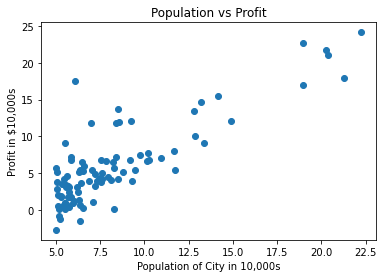

In [8]:
plt.scatter(X,y)
plt.title('Population vs Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [9]:
ones = np.ones((m,1))

In [10]:
X = np.stack([np.ones(m), X], axis=1)

In [11]:
def computeCost(X,y,theta):
    J = (np.sum(np.power((np.dot(X, theta) - y),2)))/(2*m)
    return J

In [12]:
theta = np.zeros(2)
J = computeCost(X, y, theta)
print('With theta = [0, 0] \nCost computed = %.2f' % J)
theta = np.array([-1,2])
J = computeCost(X, y, theta)
print('With theta = [-1, 2]\nCost computed = %.2f' % J)

With theta = [0, 0] 
Cost computed = 32.07
With theta = [-1, 2]
Cost computed = 54.24


In [13]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = y.size
    J_history = np.zeros(iterations)

    for i in np.arange(iterations):
        h = X.dot(theta)
        theta = theta - alpha * (1 / m) * (X.T.dot(h - y))
        J_history[i] = computeCost(X, y, theta)
    return (theta, J_history)
print('\nRunning Gradient Descent ...\n')


Running Gradient Descent ...



In [67]:
iterations = 1500
alpha = 0.0001

In [68]:
theta, Cost_J = gradientDescent(X, y, theta, alpha, iterations)
print('theta:', theta.ravel())

theta: [-3.89518093  1.19297337]


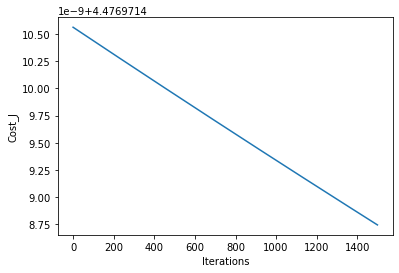

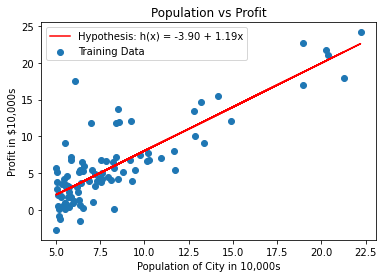

In [69]:
plt.plot(Cost_J)
plt.xlabel('Iterations')
plt.ylabel('Cost_J')
plt.show()
plt.scatter(X[:,1],y, label = 'Training Data')
plt.title('Population vs Profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], X.dot(theta),color='red',label='Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.legend(loc='best')
plt.show()

In [70]:
predict1 = np.dot([1, 3.5],theta) 
predict2 = np.dot([1, 7],theta)

In [71]:
print('For population = 35,000, we predict a profit of ', predict1*10000)
print('For population = 70,000, we predict a profit of ', predict2*10000)

For population = 35,000, we predict a profit of  2802.258720212958
For population = 70,000, we predict a profit of  44556.32678728351


In [72]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [73]:
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

In [74]:
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

In [75]:
J_vals = J_vals.T

Text(0.5, 0.92, 'Surface')

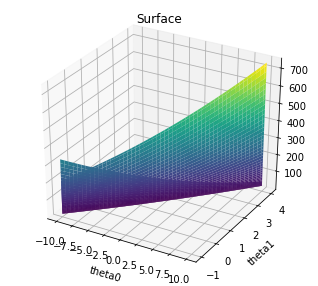

In [76]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

[-3.89518093  1.19297337]


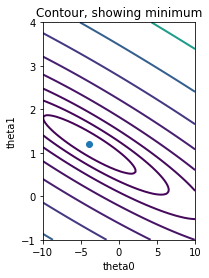

In [77]:
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.scatter(theta[0], theta[1])
plt.title('Contour, showing minimum')
print(theta)
plt.show()